## Imported Libraies and dataset

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import lux

In [2]:
df = pd.read_csv('water_potability.csv')
print(df.shape)
df.head()

(3276, 10)


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### Missing Values

In [3]:
df.isna().sum()/len(df)*100

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [4]:
df.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### Imputing Data using median

In [5]:
for i in df.columns:
    print(i)
    print(df[i].median())

ph
7.036752103833548
Hardness
196.96762686363076
Solids
20927.833606520187
Chloramines
7.130298973883081
Sulfate
333.073545745888
Conductivity
421.8849682800544
Organic_carbon
14.218337937208588
Trihalomethanes
66.62248509808484
Turbidity
3.955027562993039
Potability
0.0


In [6]:
df['ph'] = df['ph'].fillna(7.036752103833548)
df['Sulfate'] = df['Sulfate'].fillna(333.073545745888)
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(66.62248509808484)

In [7]:
df.isna().sum()/len(df)*100

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<AxesSubplot:xlabel='Potability', ylabel='count'>

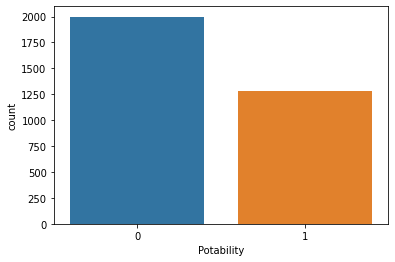

In [8]:
sns.countplot(x = 'Potability', data = df)

In [9]:
df['Potability'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### Target is not significantly imbalanced. In order to not induce bias, I will continue the analysis and 
### modelling based on the current balance of the target variable. 
### If required, I will try balancing the target and observe the changes

### Using groupby function we can know the average criteria for potable water and not potable water

In [10]:
avg_df = df
avg_df = avg_df.groupby(['Potability']).mean()
avg_df['Freq.'] = df['Potability'].value_counts().sort_index()

In [11]:
avg_df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [13]:
df.describe().T

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [14]:
x = df.iloc[:,:-1]
y = df['Potability']

In [15]:
x.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [16]:
y.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [ ]:
x = x.drop(['Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'], axis=1)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

<AxesSubplot:>

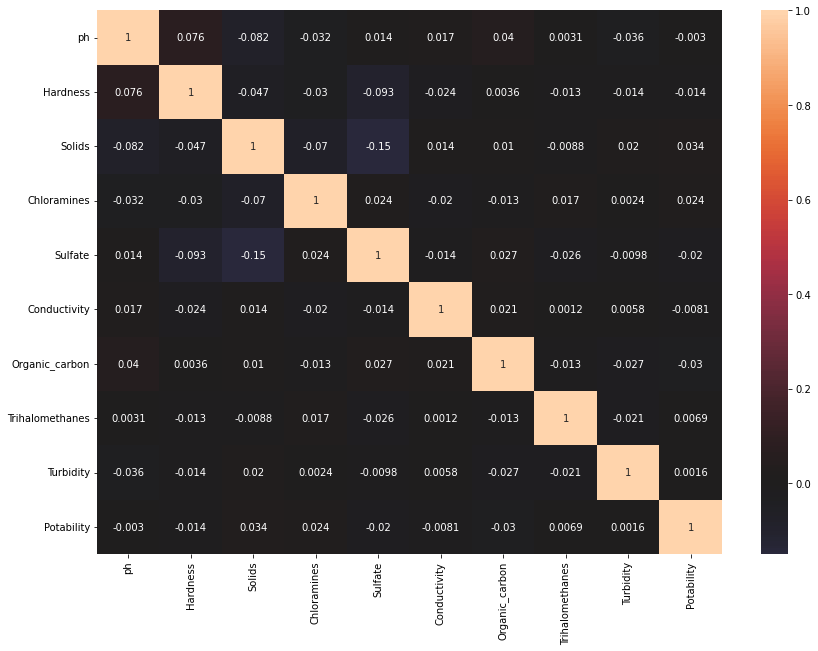

In [18]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, center=0)

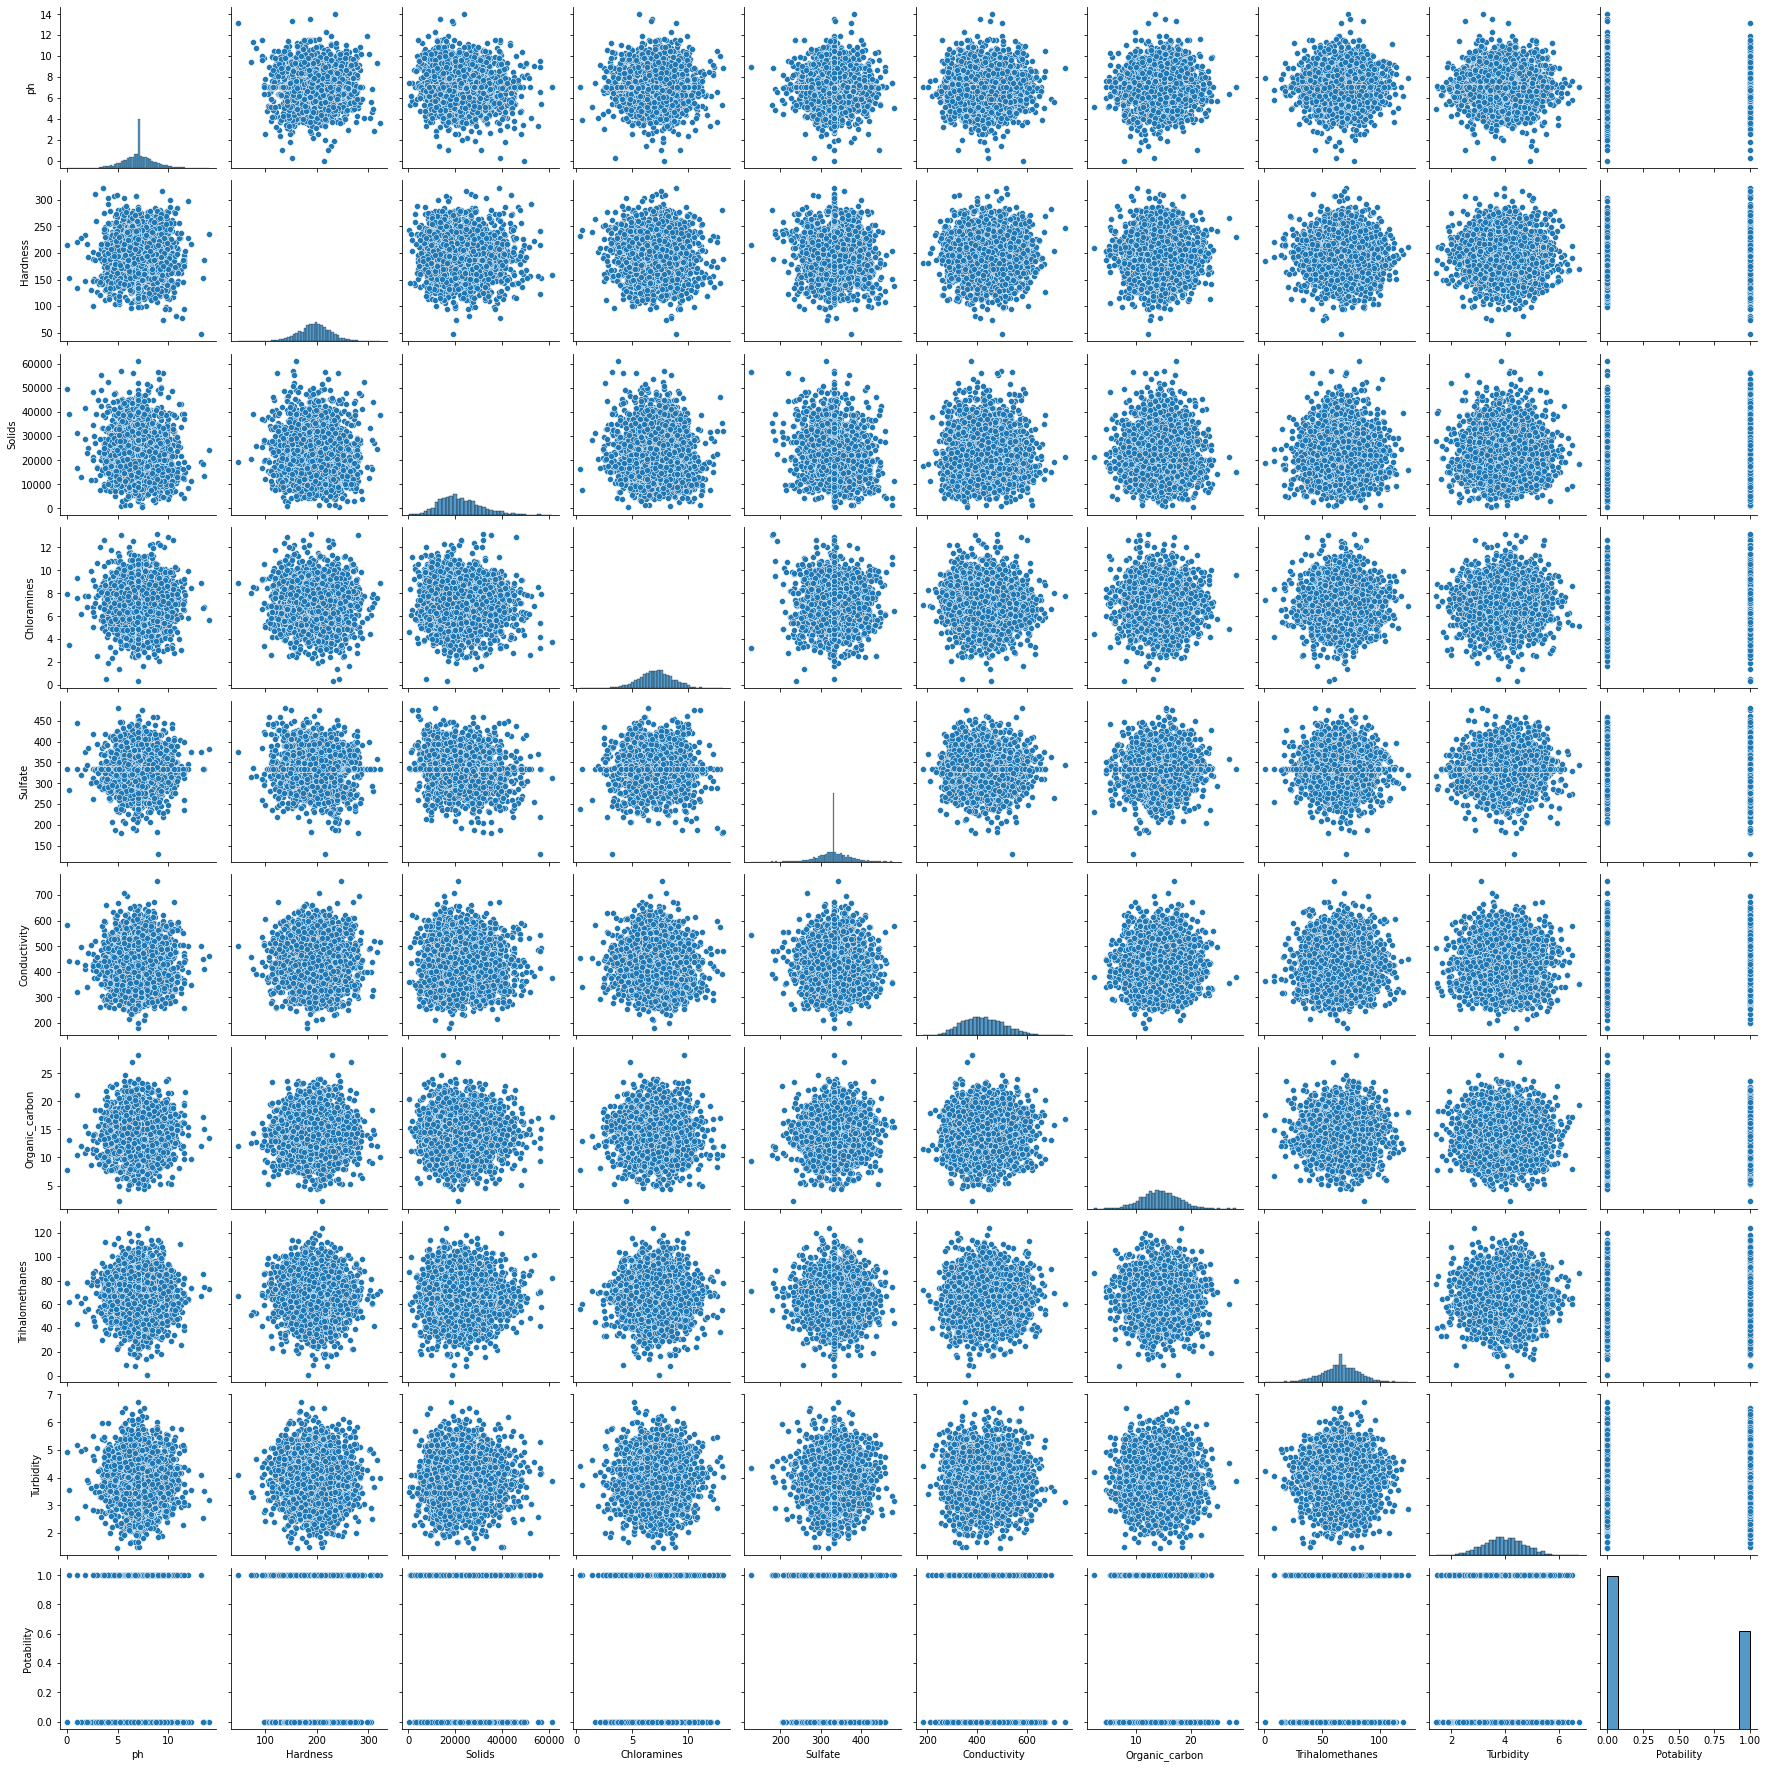

In [19]:
sns.pairplot(df)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, train_size=0.8, random_state=0)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
XGB = XGBClassifier()
GB = GradientBoostingClassifier()
AB = AdaBoostClassifier()

In [22]:
estimators = [('Decision Tree',DT),
             ('Random Foreset', RF),
             ('XGBoost', XGB),
             ('Gradient Boosting', GB),
             ('AdaBoost', AB)]

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [24]:
for model_name, model in estimators:
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    print('==='*10)
    print(model_name)
    print("Acc_train", accuracy_score(y_train, y_pred_train))
    print("Acc_test", accuracy_score(y_test, y_pred_test))
    print('==='*10)

Decision Tree
Acc_train 1.0
Acc_test 0.5853658536585366
Random Foreset
Acc_train 1.0
Acc_test 0.6890243902439024
XGBoost
Acc_train 0.9977099236641221
Acc_test 0.6753048780487805
Gradient Boosting
Acc_train 0.7416030534351145
Acc_test 0.6859756097560976
AdaBoost
Acc_train 0.6614503816793893
Acc_test 0.6509146341463414


Decision Tree


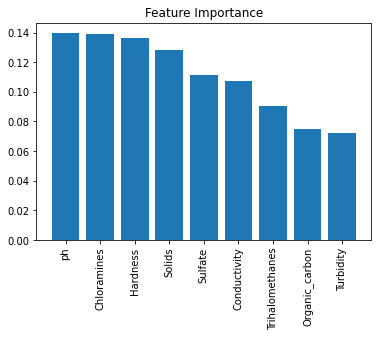

Random Foreset


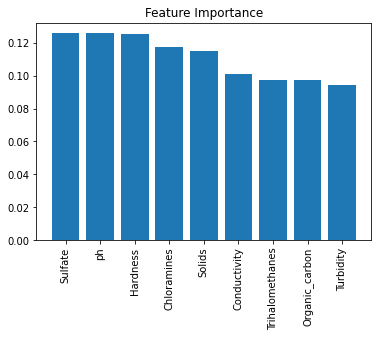

XGBoost


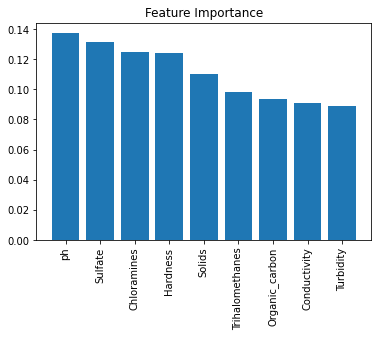

Gradient Boosting


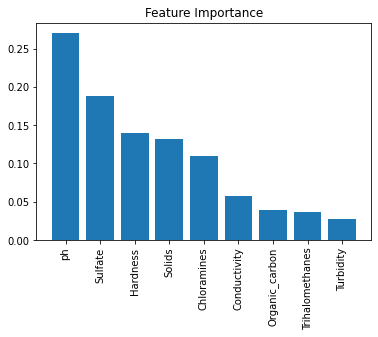

AdaBoost


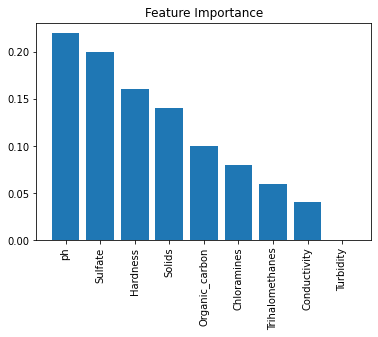

In [25]:
for model_name, model in estimators:
    print(model_name)
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    names = [df.columns[i] for i in indices]
    
    plt.figure()
    plt.title("Feature Importance")
    plt.bar(range(x.shape[1]), importances[indices])
    plt.xticks(range(x.shape[1]), names, rotation=90)
    plt.show()

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

In [28]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
# Create a pipeline
pipe = Pipeline([("standardizer", sc), ("knn", knn)])
# Create space of candidate values
search_space = [{"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]
# Create grid search
classifier = GridSearchCV(
 pipe, search_space, cv=5, verbose=0).fit(x_scaled, y)

In [29]:
classifier.best_estimator_.get_params()["knn__n_neighbors"]

10

In [30]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [31]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [32]:
print(accuracy_score(y_train, y_pred_train))
print("-"*30)
print(accuracy_score(y_test, y_pred_test))

0.6935114503816794
------------------------------
0.6524390243902439


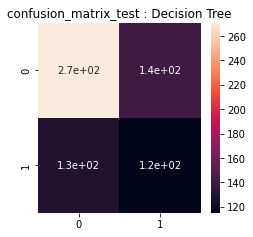

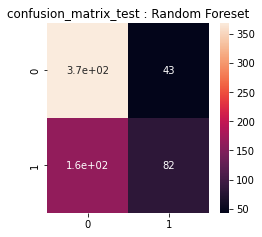

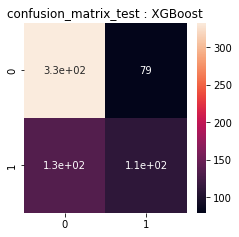

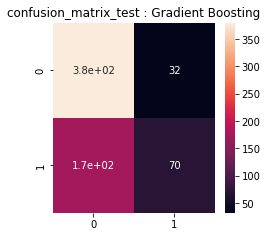

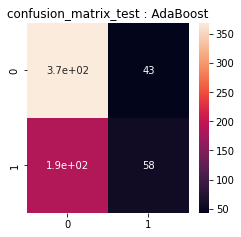

In [48]:
for model_name, model in estimators:
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred_test)

    plt.figure(figsize = (8,3.5))
    plt.subplot(1,2,1)
    sns.heatmap(cm, annot = True)
    plt.title(f'confusion_matrix_test : {model_name}')

In [34]:
from sklearn.metrics import roc_curve, auc

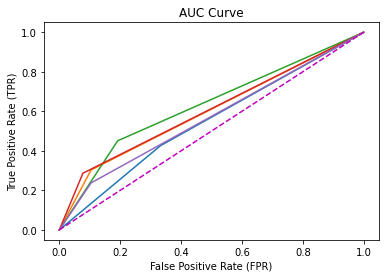

<Figure size 1008x576 with 0 Axes>

In [45]:
for model_name, model in estimators:
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_test)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
       
plt.plot([0,1], [0,1], 'm--', label='AUC = 0.5')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('AUC Curve')
plt.show()

## Conclusion
### 1. pH & Sulfate are the features which majorly relate to potability of water.
### 2. In terms of data collection, if we get more data points of samples where water is not potable, we can reduce induced bias.